In [ ]:
# Install OpenCV and zipfile
!pip install opencv-contrib-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
import itertools
import cv2
from datetime import datetime
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

import zipfile

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Decompress the dataset if it is not already decompressed, by checking the existence of the 'recordings' folder
if not os.path.exists('Data/recordings'):
    with zipfile.ZipFile('Data/recordings.zip', 'r') as zip_ref:
        zip_ref.extractall('Data')

In [3]:
INPUT_DIR = 'Data/recordings/'
OUTPUT_DIR = 'Data/recordings/'
# Print names of 10 WAV files from the input path
parent_list = os.listdir(INPUT_DIR)
for i in range(10):
    print(parent_list[i])

0_george_0.wav
0_george_1.wav
0_george_10.wav
0_george_11.wav
0_george_12.wav
0_george_13.wav
0_george_14.wav
0_george_15.wav
0_george_16.wav
0_george_17.wav


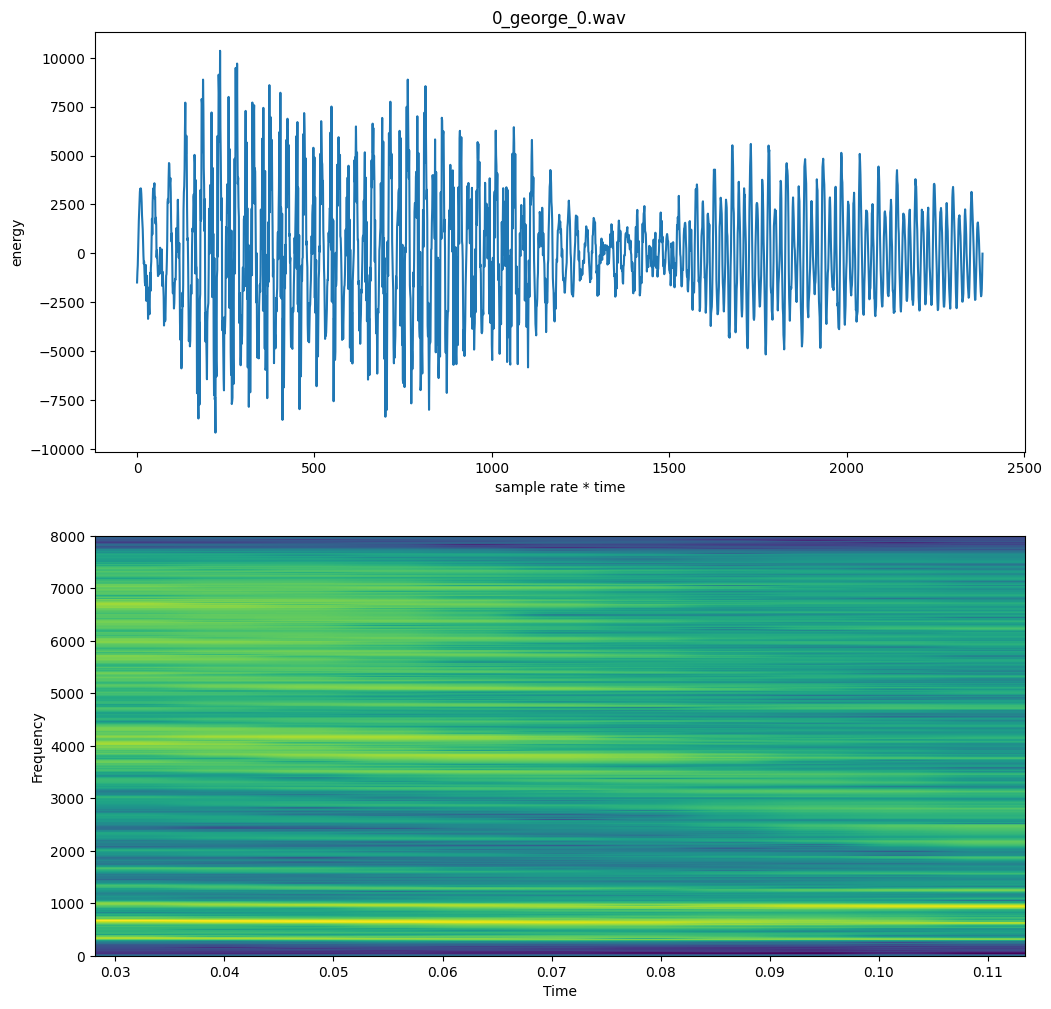

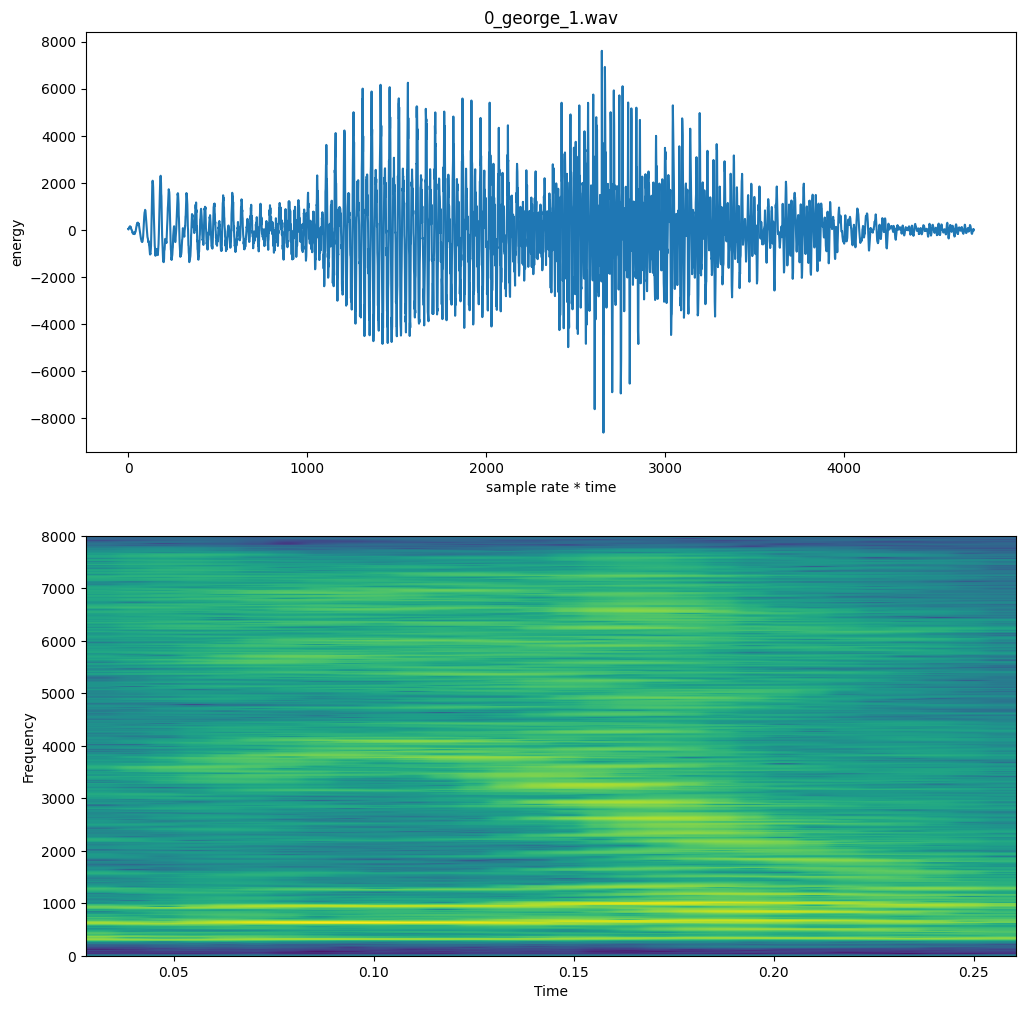

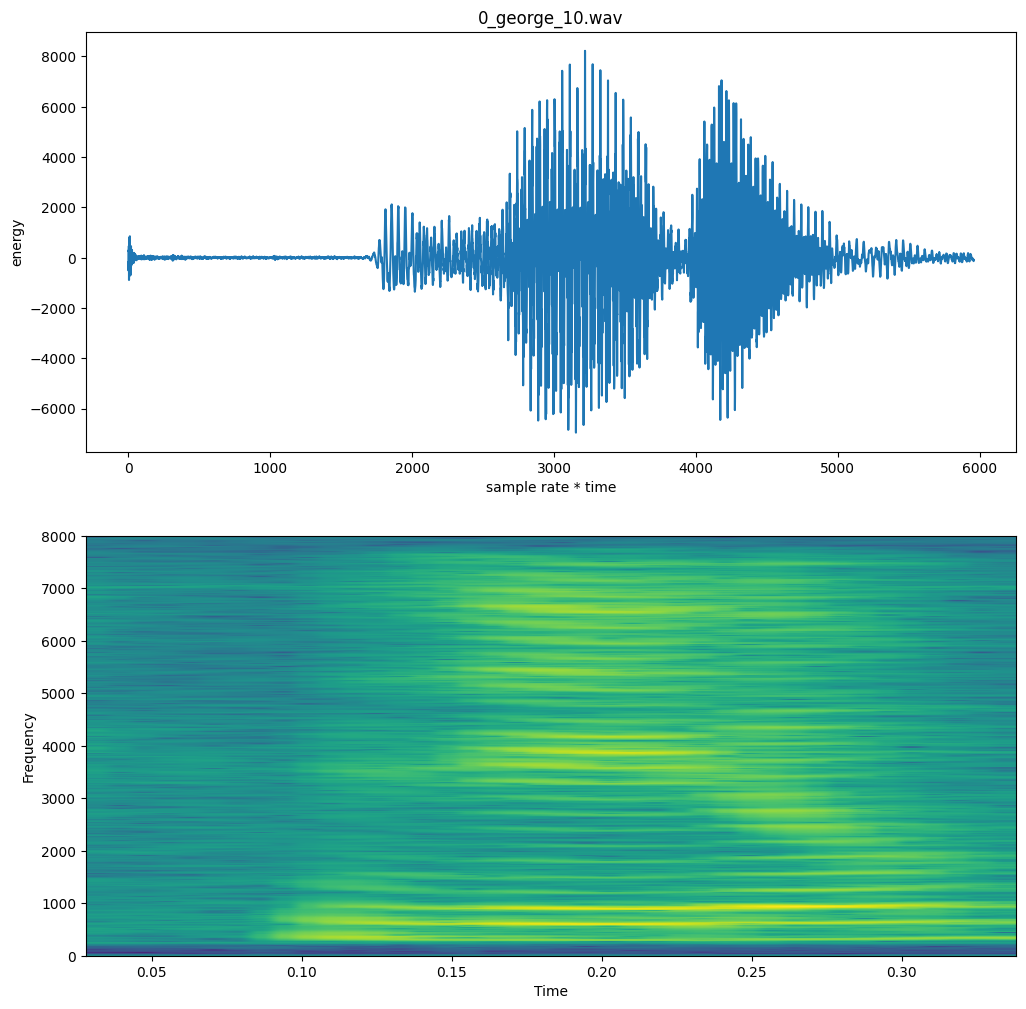

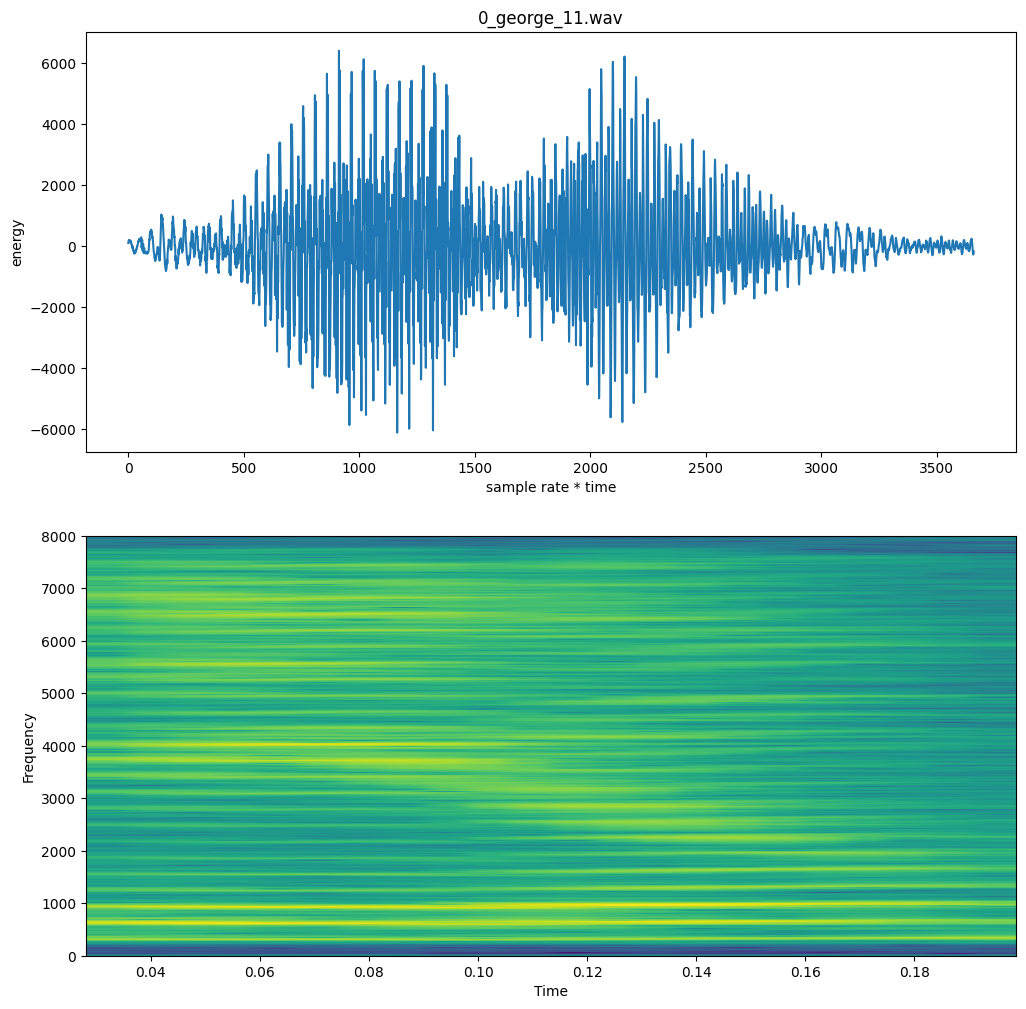

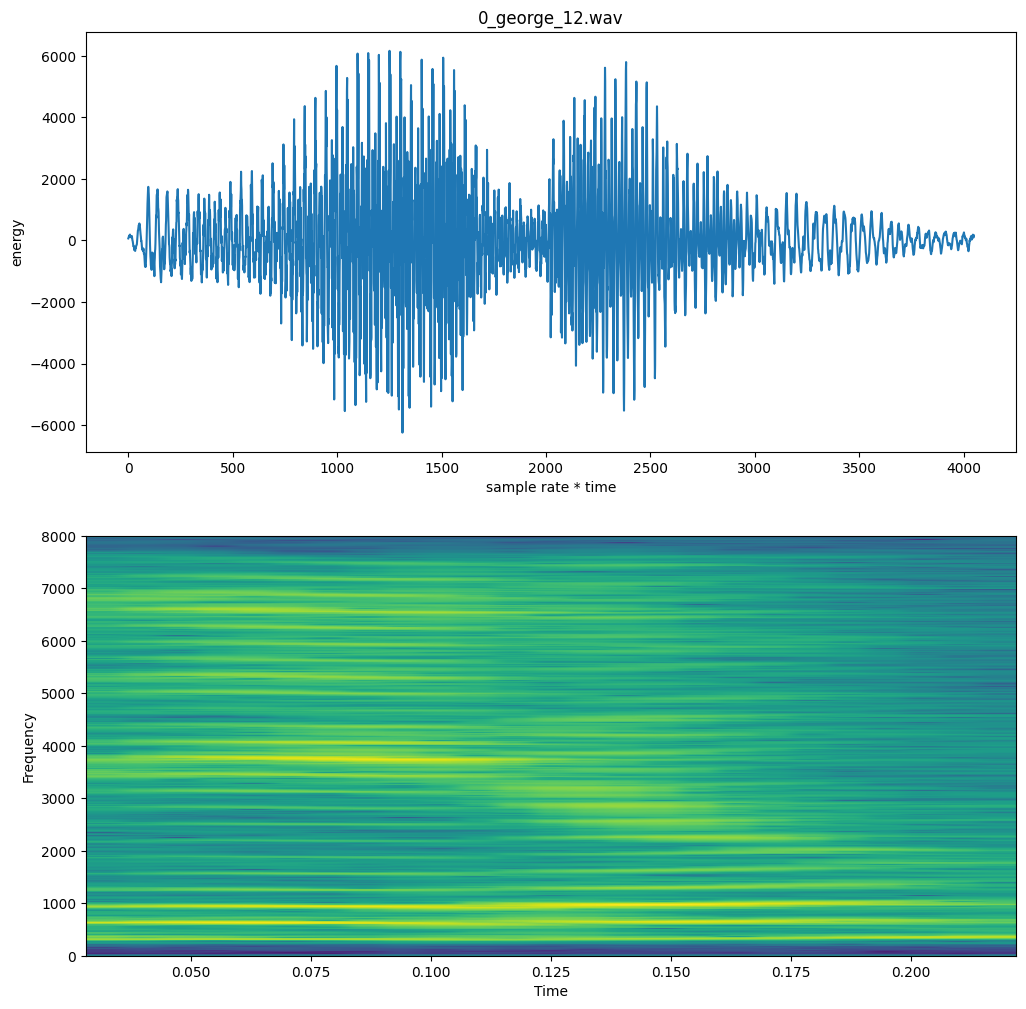

In [4]:
# Plot first 5 WAV files as a waveform and a frequency spectrum
for i in range(5):
    signal_wave = wave.open(os.path.join(INPUT_DIR, parent_list[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12, 12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()


Classes: 

class_0
class_1
class_2
class_3
class_4
class_5
class_6
class_7
class_8
class_9


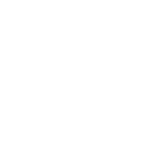

In [5]:
# Utility function to get sound and frame rate info
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate


# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-images')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'audio-images'))

# Iterate over all files in the input directory and save spectograms as images
for filename in os.listdir(INPUT_DIR):
    # Config matplotlib figure to be able to save spectograms as images
    fig = plt.figure(figsize=(1, 1), dpi=128)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    if "wav" in filename:
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem
        target_dir = f'class_{file_stem[0]}'
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'audio-images'), target_dir)
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path)
            pylab.specgram(sound_info, Fs=frame_rate)
            pylab.savefig(f'{file_dist_path}.png')
            pylab.close()

# Print the ten classes in our dataset
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images'))
print("Classes: \n")
for i in range(10):
    print(path_list[i])

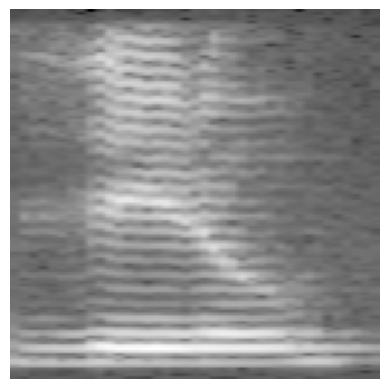

array([[87, 87, 87, ..., 99, 99, 99]], dtype=uint8)

In [27]:
# NOTE: THIS CELL IS ONLY AN EXAMPLE, PLEASE DO NOT INCLUDE IT IN YOUR EXAM SUBMISSION

# Read one image from the dataset and convert it to 8-bit grayscale
img = cv2.imread(os.path.join(OUTPUT_DIR, 'audio-images', 'class_0', '0_george_5.png'), cv2.IMREAD_GRAYSCALE)

# Plot the image
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

# Here is the content of the image after all processing steps
img.flatten().reshape(1, -1)

In [ ]:
# Loop over all images in the dataset and convert them to 8-bit grayscale, write them all to a CSV file


In [39]:
INPUT_DIR = 'Data/recordings/audio-images'  

In [40]:
def convert_and_flatten(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    flattened_img = img.flatten()
    return flattened_img

In [45]:
data = []
labels = []


In [46]:
# Iterate over subdirectories (class_0, class_1, etc.) in the input directory
for class_directory in os.listdir(INPUT_DIR):
    class_dir_path = os.path.join(INPUT_DIR, class_directory)
    
    # Ensure that it's a directory
    if os.path.isdir(class_dir_path):
        label = class_directory  # Use the subdirectory name as the class label
        
        # Iterate over the images in each subdirectory
        for filename in os.listdir(class_dir_path):
            if filename.endswith('.png'):
                file_path = os.path.join(class_dir_path, filename)
                
                # Convert the image to 8-bit grayscale and flatten it
                flattened_img = convert_and_flatten(file_path)
                
                # Add the image data and label to the lists
                data.append(flattened_img)
                labels.append(label)

In [48]:
data = pd.DataFrame(data)
data['label'] = labels
data.to_csv('Data/output.csv', index=False)

In [49]:
test = pd.read_csv('Data/output.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 16385 entries, 0 to label
dtypes: int64(16384), object(1)
memory usage: 375.0+ MB


In [50]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,74,74,74,74,74,76,77,78,80,81,...,82,82,82,81,81,81,81,81,81,class_0
1,70,70,70,73,77,78,78,77,77,77,...,85,86,86,87,87,89,90,90,90,class_0
2,87,88,92,100,102,90,74,71,82,91,...,99,98,99,102,104,104,103,102,102,class_0
3,34,34,34,35,40,43,46,46,49,53,...,86,87,87,85,83,81,80,80,80,class_0
4,83,83,83,80,76,72,70,73,77,82,...,92,90,90,90,88,87,87,86,86,class_0


In [51]:
test.tail()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
2995,81,81,81,81,84,89,95,99,102,102,...,38,51,69,83,93,98,99,99,99,class_9
2996,88,88,88,88,90,96,101,107,111,113,...,70,78,87,96,102,105,105,105,105,class_9
2997,98,98,98,98,97,97,96,95,95,95,...,80,77,73,68,64,62,61,61,61,class_9
2998,30,30,30,35,56,77,92,102,105,103,...,88,89,91,95,99,101,102,102,102,class_9
2999,96,96,96,95,92,90,87,87,86,84,...,97,98,96,91,84,78,77,77,77,class_9
